In [67]:
%pip install seaborn
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df= pd.read_csv("car_crashes.csv")
#df=sns.load_dataset(name='car_crashes')
df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<AxesSubplot:xlabel='alcohol', ylabel='total'>

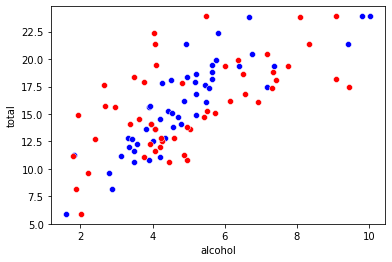

In [70]:
from turtle import color

sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
sns.scatterplot(x='speeding', y='total', color="red", data=df)

DECLARACIÓN DE VARIABLES DEPENDIENTES E INDEPENDIENTES

In [71]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']] #varias
Vars_Indep=df[['speeding']] #una
Var_Dep=df['total']

In [72]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [73]:
type(model)

sklearn.linear_model._base.LinearRegression

In [74]:
model.fit(X=Vars_Indep, y=Var_Dep) #X mayúscula porque es una matriz y minúscula porque solo es un vector

LinearRegression()

In [75]:
model.__dict__ #Te da los coeficientes de la fórmula

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['speeding'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.24931442]),
 'rank_': 1,
 'singular_': array([14.2676265]),
 'intercept_': 9.545877626552604}

$$
total= 2.0325063 \cdot alcohol + 5.857776154826299

$$

***************************Modelo predictivo***************************

In [77]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred1= model.predict(X=df[['speeding']])
y_pred1

array([18.70585098, 18.81703996, 17.67891452, 14.58311338, 14.7929982 ,
       15.83242781, 15.75247168, 17.23665722, 12.05200236, 14.24205054,
       13.24884558, 21.35189893, 16.42710147, 15.30271849, 14.07464241,
       12.88029782, 15.55008275, 14.62559007, 18.50970861, 16.71444379,
       14.85546393, 11.90208463, 13.77355764, 12.30436387, 12.8440677 ,
       18.19488138, 19.9726558 , 11.96579966, 16.34089878, 14.61809419,
       11.78464907, 13.91348085, 14.4631792 , 17.73138573, 16.41335901,
       14.47817097, 17.50151187, 14.82298175, 20.91463888, 14.26079026,
       20.89215122, 17.05925457, 14.66182019, 19.24055755, 15.61629641,
       14.64308047, 12.56047333, 15.10782544, 19.65532994, 15.75247168,
       18.67586743])

In [78]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred1) #En la columna 0, nombre de la columnas y la variable
df

,Predicciones,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.705851,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.817040,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,17.678915,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,14.583113,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,14.792998,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,15.832428,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,15.752472,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,17.236657,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,12.052002,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,14.242051,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


<AxesSubplot:xlabel='alcohol', ylabel='total'>

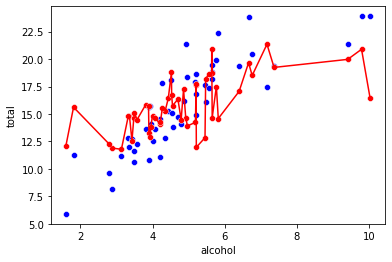

In [79]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='alcohol', y='total', color="blue", data=df) #total real
sns.scatterplot(x='alcohol', y='Predicciones', color="red", data=df) #predicción
sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df) #modelo

In [80]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep) #R^2 = 72% de eficiencia
coef_Deter

0.37399046804438096

In [81]:
#Coeficiente de CORRELACIÓN
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6115476008001184